In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

/home/taiger/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import datagen
import utils
from model import RPN

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(array([9, 9]), array([[108., 156., 124., 190.],
        [157., 130., 190., 163.],
        [ -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.]]))

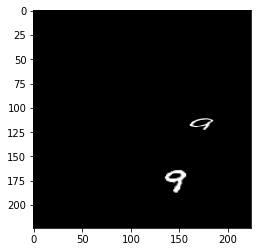

In [3]:
images, gt_cls, gt_boxes = datagen.generate_batch(32)

image = np.squeeze(images[0], axis=-1)
plt.imshow(image, cmap='gray')
gt_cls[0], gt_boxes[0]

In [4]:
tf.reset_default_graph()
model = RPN()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    anchors, labels, mappings, loss = sess.run([model.out_anchors, model.labels, model.mappings, model.loss], feed_dict={
        model.images: images,
        model.gt_boxes: gt_boxes
    })
anchors.shape, labels.shape, mappings.shape

((6000, 4), (6000,), (6000,))

In [5]:
loss

0.69758016

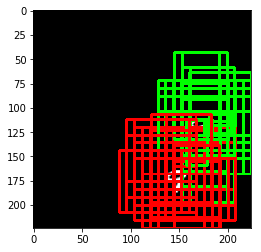

In [6]:
out = cv2.merge([(image * 255).astype(np.uint8)] * 3)
for idx in np.where(labels == 1)[0]:
    y1, x1, y2, x2 = map(int, anchors[idx])
    gt_box = mappings[idx]
    color = [(0, 255, 0), (255, 0, 0)][gt_box]
    cv2.rectangle(out, (x1, y1), (x2, y2), color, 2)
plt.imshow(out);

In [7]:
np.where(labels == 1)

(array([ 446,  537,  792,  826,  911, 1260, 1317, 1377, 1696, 1893, 1917,
        2070, 2081, 2121, 2209, 2265, 2275, 2702, 2705, 2798, 2864, 2953,
        3003, 3112, 3196, 3234, 3242, 3489, 3604, 3723, 3767, 3869, 3972,
        4103, 4116, 4118, 4147, 4216, 4263, 4353, 4366, 4401, 4585, 4708,
        4760, 4820, 4879, 4882, 4978, 4990, 5043, 5100, 5118, 5131, 5227,
        5299, 5330, 5334, 5348, 5438, 5495, 5496, 5528, 5555, 5588, 5615,
        5619, 5712, 5713, 5749, 5831, 5840]),)

In [8]:
np.unique(labels, return_counts=True)

(array([0., 1.], dtype=float32), array([5928,   72]))